# Lead Scoring Case Study

## Problem Statement

- X Education, an education company which sells online courses to industry professionals, gets multiple leads with an exisiting lead conversion rate of 30%.
<br> <br> <b>
Modelling Required: </b>
- To build a logisitic regression model wherein we need to assign a <b> lead score </b> to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.
- To identify the most potential leads, also known as <b> ‘Hot Leads’ </b> based on the Lead Score
- To increase the lead conversion rate, as the sales team will now be focusing more on communicating with the <b> potential leads </b> rather than making calls to everyone
- The target lead conversion rate should be around <b> 80% </b>.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Please specify the location of the Excel file here

In [3]:
path = r'C:\Users\secty\Downloads\Upgrad\Lead Scoring Case Study'

Extracting the lead score data

In [4]:
leads = pd.read_csv(path + "\\" + 'Leads.csv')

In [5]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
leads.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


### Performing routine checks on the Lead Score Data

In [7]:
leads.shape

(9240, 37)

In [8]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [9]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

#### Checking for null values

In [10]:
leads.isnull().sum(axis = 0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

We can see that there are null values in many of the columns. Let us try to find the percentage of missing values in each column

#### Checking for percentage of missing values

In [11]:
round((leads.isnull().sum(axis = 0)/len(leads.index)) * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Treating for missing values

In [12]:
# Removing columns having more than 30% missing values
leads = leads.loc[:, round((leads.isnull().sum(axis=0)/len(leads.index)) * 100, 2) <= 30]

#### Handling the null values in Lead Source

In [13]:
# Since Lead Source is a relevant column, we will not delete the column
# But we can observe that the percentage of missing values is quite low(0.39)
# Hence we will remove the rows with null values in Lead Source
leads = leads[~pd.isnull(leads['Lead Source'])]

#### Handling the null values in TotalVisits and Page Views Per Visit

In [14]:
# TotalVisits and Page Views Per Visit are also relevant columns
# So we will not delete the columns
# But they have very low percentage of missing values (1.48)
# Hence we will remove the rows with null values in both TotalVisits and Page Views Per Visit
leads = leads[~pd.isnull(leads['TotalVisits'])]
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

#### Handling the null values in Country

In [15]:
round(leads['Country'].value_counts()/len(leads.index)* 100, 2)

India                   71.53
United States            0.76
United Arab Emirates     0.58
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.17
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
France                   0.07
Oman                     0.07
unknown                  0.06
Germany                  0.04
South Africa             0.04
Nigeria                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
Bangladesh               0.02
Belgium                  0.02
Asia/Pacific Region      0.02
Ghana                    0.02
Philippines              0.02
Italy                    0.02
Netherlands              0.02
China                    0.02
Uganda                   0.02
Vietnam                  0.01
Switzerland              0.01
Russia                   0.01
Tanzania                 0.01
Malaysia                 0.01
Indonesia 

The column 'Country' has around 26% missing values. Another 71% of the records have 'India' in them. Including this column in our model will not add much to the predicitve power. Hence we will drop this column.

In [16]:
leads = leads.drop('Country', axis = 1)

#### Handling the null values in Specialization column

In [17]:
round(leads['Specialization'].value_counts()/len(leads.index)* 100, 2)

Select                               20.40
Finance Management                   10.57
Human Resource Management             9.22
Marketing Management                  9.07
Operations Management                 5.50
Business Administration               4.40
IT Projects Management                4.03
Supply Chain Management               3.81
Banking, Investment And Insurance     3.69
Travel and Tourism                    2.23
Media and Advertising                 2.23
International Business                1.94
Healthcare Management                 1.72
E-COMMERCE                            1.22
Hospitality Management                1.22
Retail Management                     1.10
Rural and Agribusiness                0.80
E-Business                            0.63
Services Excellence                   0.44
Name: Specialization, dtype: float64

We can see that 'Specialization' column has around 15% missing values. Also another 20% records have the value 'Select' in it, which effectively amounts to null values. So we will drop this column.

In [18]:
leads = leads.drop('Specialization', axis = 1)

#### Handling the missing values in 'How did you hear about X Education'

In [19]:
round(leads['How did you hear about X Education'].value_counts()/len(leads.index)* 100, 2)

Select                   53.85
Online Search             8.90
Word Of Mouth             3.82
Student of SomeSchool     3.42
Other                     2.05
Multiple Sources          1.68
Advertisements            0.77
Social Media              0.73
Email                     0.29
SMS                       0.25
Name: How did you hear about X Education, dtype: float64

We can see that a high percentage of values in this column are 'Select', which means that no option was selected by the user. Also another 25% of values are null values. So we will drop this column

In [20]:
leads = leads.drop('How did you hear about X Education', axis = 1)

#### Handling missing values in 'What is your current occupation'

In [21]:
round(leads['What is your current occupation'].value_counts()/len(leads.index)* 100, 2)

Unemployed              60.35
Working Professional     7.46
Student                  2.27
Other                    0.17
Housewife                0.10
Businessman              0.09
Name: What is your current occupation, dtype: float64

The percentage of missing values here is almost 30%. Also, a high percentage of records has ‘Unemployed’ in them. This almost amounts to no value addition in prediction. So here we decided to drop this column.


In [22]:
leads = leads.drop('What is your current occupation', axis = 1)

#### Handling missing values in 'What matters most to you in choosing a course'

In [23]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

We can see that most of the values in this column are 'Better Career Prospects'. This almost amounts to no value addition in prediction. So we will drop this column.

In [24]:
leads = leads.drop('What matters most to you in choosing a course', axis = 1)

#### Handling the null values in 'Lead Profile'

In [25]:
leads['Lead Profile'].value_counts()

Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [26]:
round(leads['Lead Profile'].value_counts()/len(leads.index)* 100, 2)

Select                         44.69
Potential Lead                 17.13
Other Leads                     5.31
Student of SomeSchool           2.64
Lateral Student                 0.23
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64

Here we can see around 45% of values are 'Select' indicating that nothing was selected. Around 30% values are also null. So we will drop this column.

In [27]:
leads = leads.drop('Lead Profile', axis = 1)

#### Handling the null values in 'City'

In [28]:
round(leads['City'].value_counts()/len(leads.index)* 100, 2)

Mumbai                         35.01
Select                         23.76
Thane & Outskirts               8.21
Other Cities                    7.49
Other Cities of Maharashtra     4.92
Other Metro Cities              4.15
Tier II Cities                  0.82
Name: City, dtype: float64

Around 23% of values here are 'Select'. Another 15% values are null. A 35% of the records have the value 'Mumbai' in them. So we will delete this column.

In [29]:
leads = leads.drop('City', axis = 1)

In [30]:
round((leads.isnull().sum(axis = 0)/len(leads.index)) * 100, 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

We can see that all the null values have been removed from the dataset

### Data Preparation

#### Outliers Analysis

In [31]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 

In [32]:
# Checking for Outliers in the Numerical columns
num_leads = leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [33]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


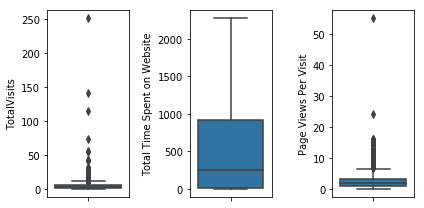

In [34]:
plt.figure(figsize=(6,3))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leads)
plt.tight_layout()
plt.show()

There are some outliers in the 'TotalVisits' and 'Page Views Per Visit' columns. So we will remove these outliers.

#### Removing the outliers

In [35]:
Q1 = leads['TotalVisits'].quantile(0.05)
Q3 = leads['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


#### Copying the lead numbers so that we can assign lead scores to the lead numbers

In [36]:
lead_numbers = leads['Lead Number']
lead_numbers = pd.DataFrame(lead_numbers)
lead_numbers.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [37]:
lead_numbers.shape

(9048, 1)

In [38]:
# Dropping the Prospect ID column
leads.drop('Prospect ID', axis = 1, inplace = True)
# Dropping the Lead Number column
leads.drop('Lead Number', axis = 1, inplace = True)

#### Converting binary variables (Yes/No) to 0/1

In [39]:
# List of variables to map
varList = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 
           'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
           'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
           'Get updates on DM Content', 'I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

leads[varList] = leads[varList].apply(binary_map)

In [40]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,...,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,...,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,...,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,...,0,0,0,0,0,0,0,0,0,Modified


#### Dummy Variables

In [41]:
cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']
for col in cols:
    # Get the dummy variables for the categorical features and store it in leads_dummy
    leads_dummy = pd.get_dummies(leads[col], prefix = col, drop_first = True)
    # Add the results to the originsl leads dataframe
    leads = pd.concat([leads, leads_dummy], axis = 1)
    leads.drop(col, axis = 1, inplace = True)
    
leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Train - Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Putting feature variables to X
X = leads.drop(['Converted'], axis = 1)
# Putting response variable to y
y = leads['Converted']

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

C:\Users\Avemaria\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Avemaria\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8425,0,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8341,0,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7376,0,0,-0.402157,-0.071940,-0.165214,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7414,0,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3521,0,0,0.517288,1.213416,1.305648,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Checking the Existing Conversion Rate

In [47]:
round(sum(leads['Converted'])/len(leads.index) * 100, 2)

37.89

We have an existing conversion rate of around 38%

### Looking at Correlations

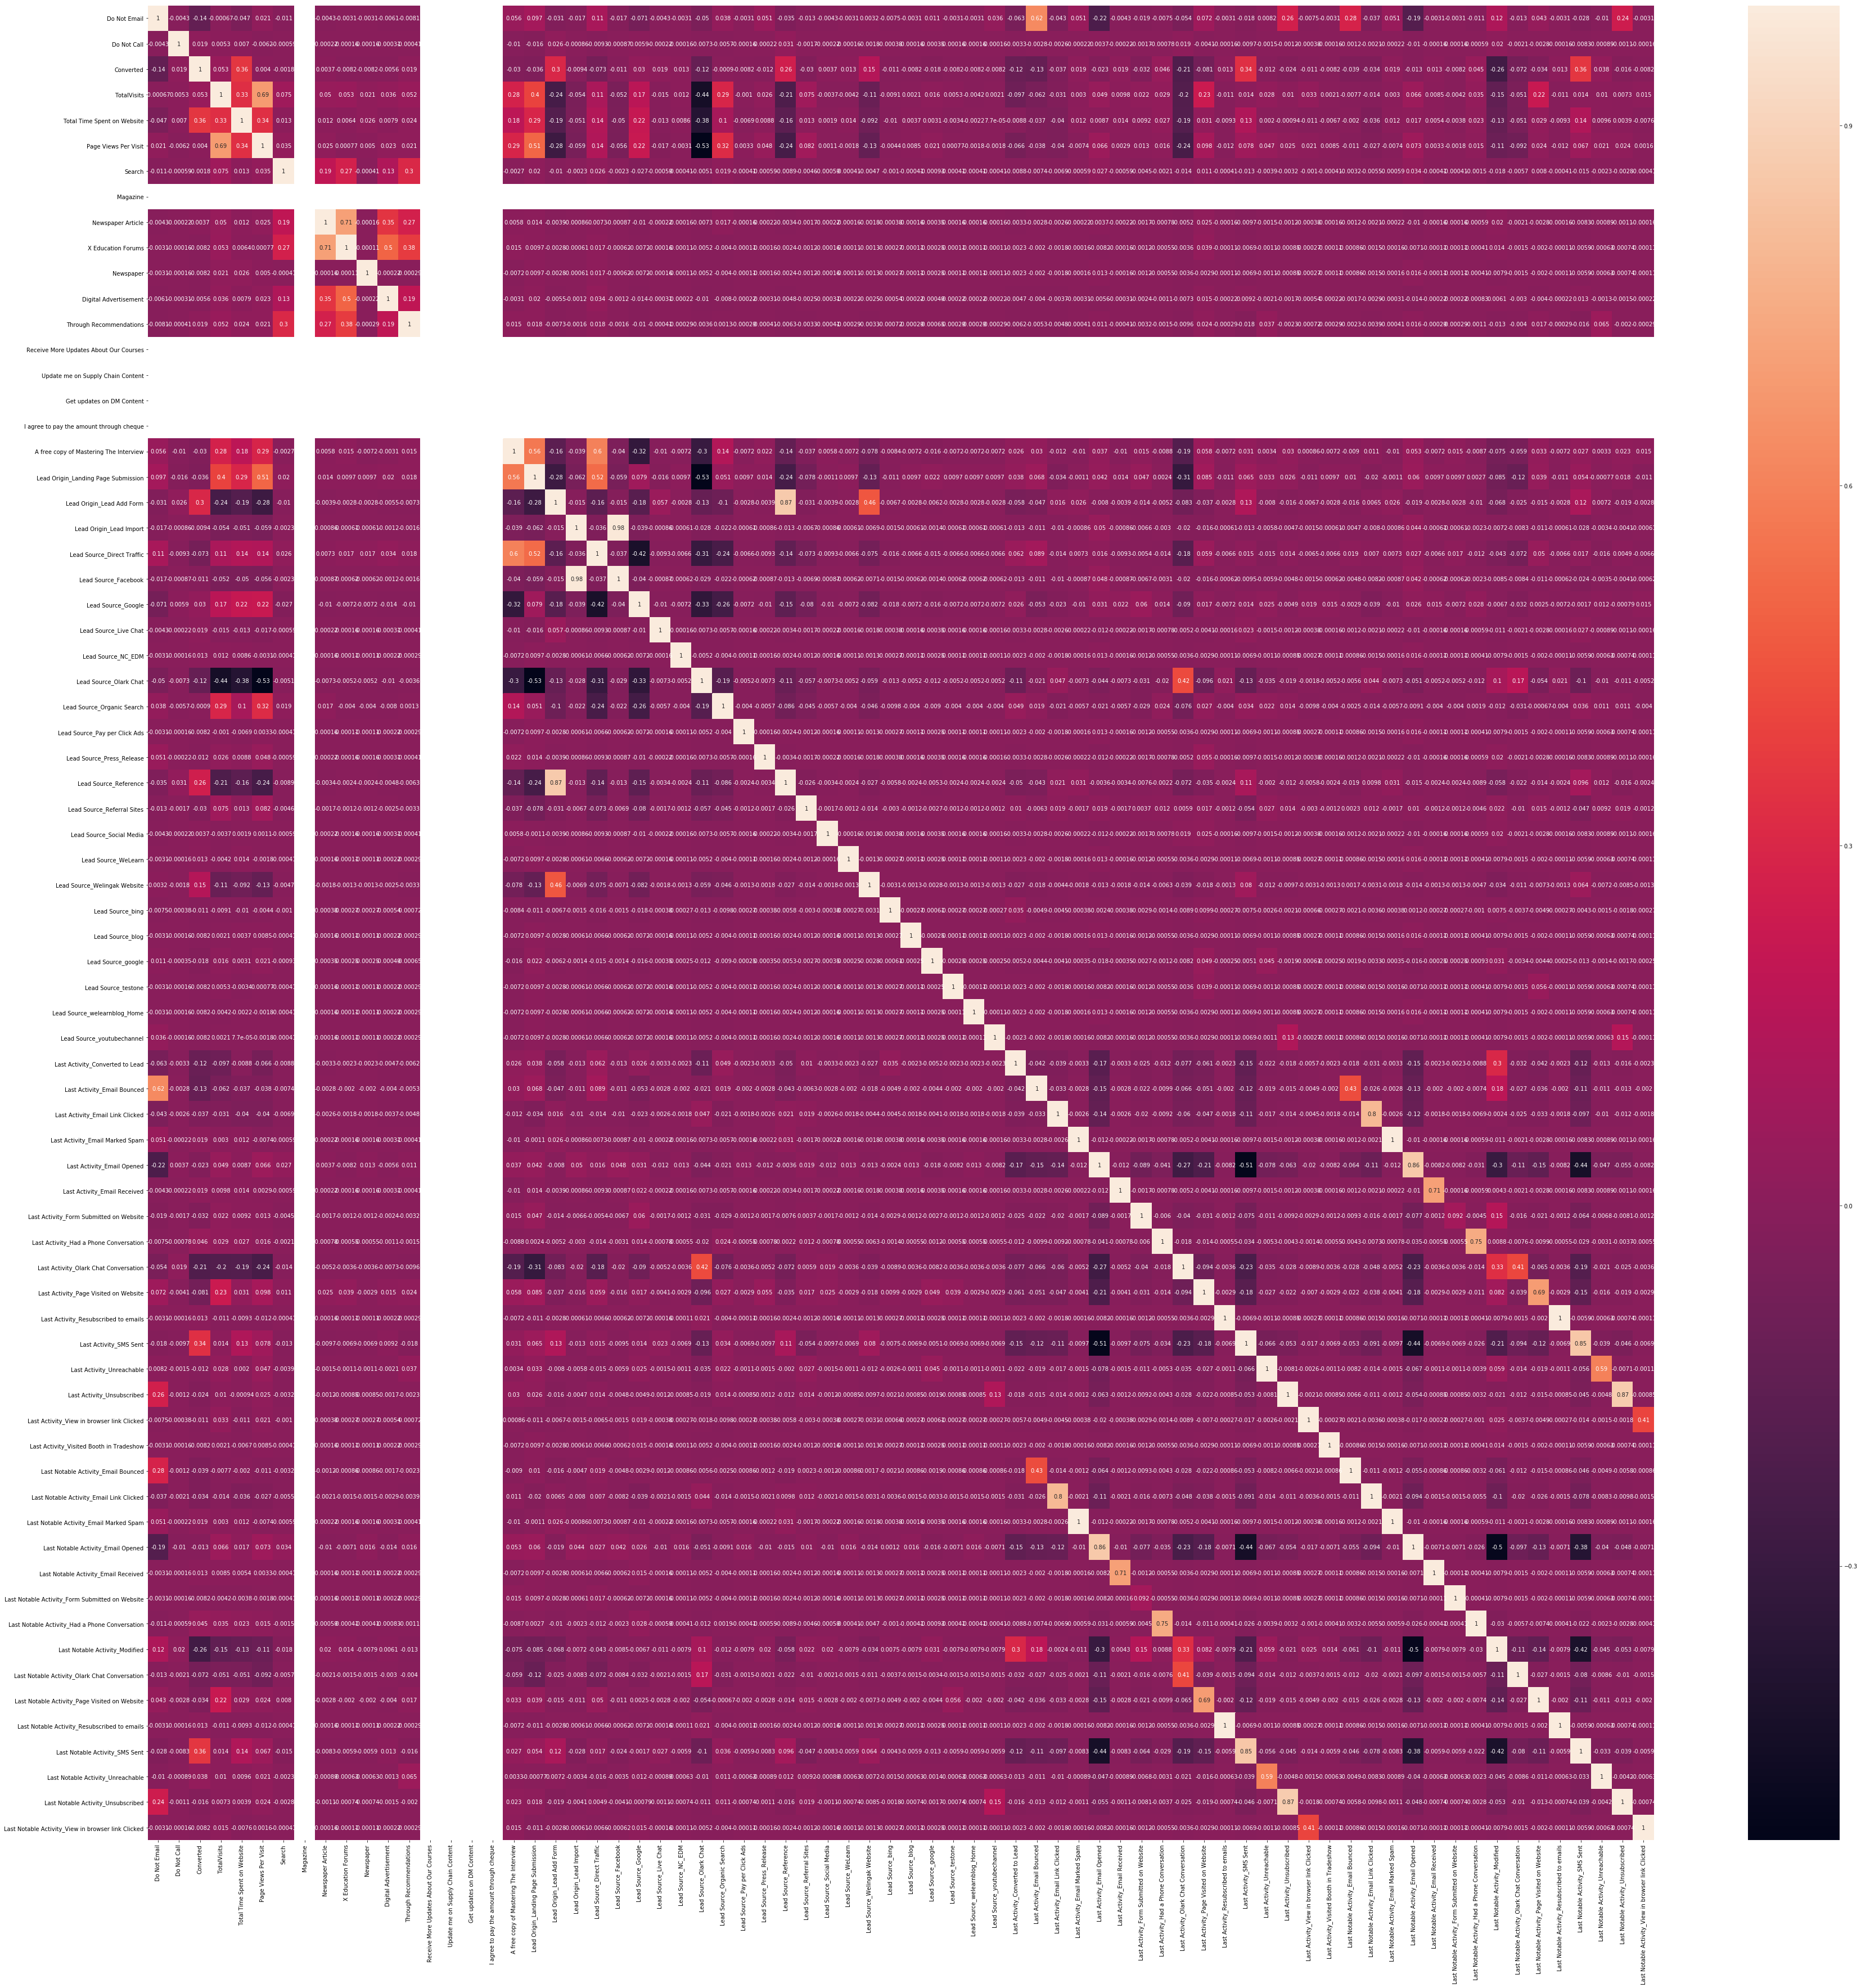

In [48]:
plt.figure(figsize = (60,60))
sns.heatmap(leads.corr(), annot = True)
plt.show()

We do not see a lot of features having high correlations. So we will not eliminate any of these features for now and will proceed with model building

### Model Building

In [49]:
import statsmodels.api as sm

In [50]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 06 Jan 2020   Deviance:                          nan
Time:                        17:31:38   Pearson chi2:                 7.72e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                              -6.274e+15   7.51e+07  -8.35e+07      0.000   -6.27e+15   -6.27e+15
Do Not Email                                       -1.113e+15   4.51e+06  -2.47e+08      0.000   -1.11e+15   -1.11e+15
Do Not Call                                         1.599e+15   4.76e+07   3.36e+07      0.000     1.6e+15     1.6e+15
TotalVisits                                         2.193e+14   1.29e+06    1.7e+08      0.000    2.19e+14    2.19e+14
Total Time Spent on Website                         9.384e+13   9.72e+05   9.65e+07      0.000    9.38e+13    9.38e+13
Page Views Per Visit                               -1.632e+14   1.39e+06  -1.17e+08      0.000   -1.63e+14   -1.63e+14
Search                                             -5.521e+14   2.16e+07  -2.55e+07      0.000   -5.52e+14   -5.52e+14
Magazine                                              -4.8112   1.54e-06  -3.12e+06      0.000      -4.811      -4.811
Newspaper Article                                   2.618e+15   6.73e+07   3.89e+07      0.000    2.62e+15    2.62e+15
X Education Forums                                  -7.77e+15   5.13e+07  -1.52e+08      0.000   -7.77e+15   -7.77e+15
Newspaper                                          -1.199e+16   6.72e+07  -1.78e+08      0.000    -1.2e+16    -1.2e+16
Digital Advertisement                               -7.77e+15   5.13e+07  -1.52e+08      0.000   -7.77e+15   -7.77e+15
Through Recommendations                             9.037e+15   3.42e+07   2.64e+08      0.000    9.04e+15    9.04e+15
Receive More Updates About Our Courses              -371.1213   1.78e-06  -2.09e+08      0.000    -371.121    -371.121
Update me on Supply Chain Content                     60.4731   8.29e-07   7.29e+07      0.000      60.473      60.473
Get updates on DM Content                             11.5600   9.64e-07    1.2e+07      0.000      11.560      11.560
I agree to pay the amount through cheque              57.3353   4.33e-07   1.32e+08      0.000      57.335      57.335
A free copy of Mastering The Interview             -6.251e+13   2.61e+06  -2.39e+07      0.000   -6.25e+13   -6.25e+13
Lead Origin_Landing Page Submission                -1.131e+14    2.7e+06  -4.19e+07      0.000   -1.13e+14   -1.13e+14
Lead Origin_Lead Add Form                           8.423e+15   4.75e+07   1.77e+08      0.000    8.42e+15    8.42e+15
Lead Origin_Lead Import                             1.162e+16   6.88e+07   1.69e+08      0.000    1.16e+16    1.16e+16
Lead Source_Direct Traffic                          9.155e+15   6.73e+07   1.36e+08      0.000    9.16e+15    9.16e+15
Lead Source_Facebook                                -2.35e+15    9.5e+07  -2.47e+07      0.000   -2.35e+15   -2.35e+15
Lead Source_Google                                  9.351e+15   6.72

### Feature Selection usng RFE

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [52]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('Search', False, 31),
 ('Magazine', False, 46),
 ('Newspaper Article', False, 36),
 ('X Education Forums', False, 28),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 23),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 47),
 ('Update me on Supply Chain Content', False, 48),
 ('Get updates on DM Content', False, 49),
 ('I agree to pay the amount through cheque', False, 50),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', False, 39),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 35),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Through Recommendations', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [55]:
X_train_rfe = X_train[col]

#### Assessing the model with statsmodels

In [56]:
X_train_sm = sm.add_constant(X_train_rfe)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2798.1
Date:                Mon, 06 Jan 2020   Deviance:                       5596.2
Time:                        17:31:48   Pearson chi2:                 6.47e+03
No. Iterations:                    20   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1547      0.052    -22.216      0.000      -1.257      -1.053
Do Not Email                                      -1.2873      0.187     -6.900      0.000      -1.653      -0.922
Total Time Spent on Website                        1.1303      0.039     28.833      0.000       1.053       1.207
Newspaper                                        -23.1898   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations                            1.6886      1.309      1.290      0.197      -0.877       4.254
Lead Origin_Lead Add Form                          2.5706      1.228      2.094      0.036       0.165       4.977
Lead Origin_Lead Import                            1.7862      0.451      3.959      0.000       0.902       2.671
Lead Source_Olark Chat                             1.2110      0.100     12.097      0.000       1.015       1.407
Lead Source_Reference                              1.6512      1.245      1.327      0.185      -0.788       4.091
Lead Source_Social Media                           2.1897      1.437      1.524      0.128      -0.627       5.007
Lead Source_Welingak Website                       3.8478      1.592      2.417      0.016       0.727       6.968
Last Activity_Converted to Lead                   -1.0513      0.200     -5.263      0.000      -1.443      -0.660
Last Activity_Email Bounced                       -0.8644      0.372     -2.321      0.020      -1.594      -0.134
Last Activity_Email Received                      21.6778      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Last Activity_Had a Phone Conversation             1.7155      1.051      1.632      0.103      -0.345       3.776
Last Activity_Olark Chat Conversation             -1.6771      0.159    -10.558      0.000      -1.988      -1.366
Last Activity_Page Visited on Website             -0.7090      0.150     -4.729      0.000      -1.003      -0.415
Last Notable Activity_Email Link Clicked          -0.6947      0.261     -2.661      0.008      -1.206      -0.183
Last Notable Activity_Had a Phone Conversation     1.3924      1.514      0.920      0.358      -1.574       4.359
Last Notable Activity_SMS Sent                     1.4555      0.079     18.385      0.000       1.300       1.611
Last Notable Activity_Unreachable                  1.7963      0.518      3.470      0.001       0.782       2.811
==================================================================================================================
"""

We can see that the p-values of some variables are high indicating that the variables are insignificant in the presence of other variables. Hence we will drop those variables one by one and check the statistics.

#### Dropping the variable 'Newspaper'

In [57]:
X_train_rfe = X_train_rfe.drop(["Newspaper"], axis = 1)

#### Assessing the model with statsmodels

In [58]:
X_train_sm = sm.add_constant(X_train_rfe)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2799.9
Date:                Mon, 06 Jan 2020   Deviance:                       5599.8
Time:                        17:31:49   Pearson chi2:                 6.46e+03
No. Iterations:                    19   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1555      0.052    -22.236      0.000      -1.257      -1.054
Do Not Email                                      -1.2862      0.186     -6.897      0.000      -1.652      -0.921
Total Time Spent on Website                        1.1277      0.039     28.804      0.000       1.051       1.204
Through Recommendations                            1.6892      1.309      1.291      0.197      -0.876       4.254
Lead Origin_Lead Add Form                          2.5696      1.227      2.093      0.036       0.164       4.975
Lead Origin_Lead Import                            1.7847      0.451      3.955      0.000       0.900       2.669
Lead Source_Olark Chat                             1.2092      0.100     12.081      0.000       1.013       1.405
Lead Source_Reference                              1.6505      1.244      1.326      0.185      -0.789       4.090
Lead Source_Social Media                           2.1889      1.437      1.523      0.128      -0.627       5.005
Lead Source_Welingak Website                       3.8467      1.592      2.416      0.016       0.727       6.967
Last Activity_Converted to Lead                   -1.0491      0.200     -5.255      0.000      -1.440      -0.658
Last Activity_Email Bounced                       -0.8635      0.372     -2.319      0.020      -1.593      -0.134
Last Activity_Email Received                      20.6808   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
Last Activity_Had a Phone Conversation             1.7161      1.051      1.633      0.102      -0.343       3.775
Last Activity_Olark Chat Conversation             -1.6756      0.159    -10.551      0.000      -1.987      -1.364
Last Activity_Page Visited on Website             -0.7066      0.150     -4.715      0.000      -1.000      -0.413
Last Notable Activity_Email Link Clicked          -0.6930      0.261     -2.656      0.008      -1.204      -0.182
Last Notable Activity_Had a Phone Conversation     1.3924      1.513      0.920      0.357      -1.573       4.358
Last Notable Activity_SMS Sent                     1.4566      0.079     18.405      0.000       1.301       1.612
Last Notable Activity_Unreachable                  1.7967      0.518      3.472      0.001       0.782       2.811
==================================================================================================================
"""

'Last Activity_Email Received' has a high p-value. So we will drop this variable

#### Dropping the variable 'Last Activity_Email Received'

In [59]:
X_train_rfe = X_train_rfe.drop(["Last Activity_Email Received"], axis = 1)

#### Assessing the model with statsmodels

In [60]:
X_train_sm = sm.add_constant(X_train_rfe)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.4
Date:                Mon, 06 Jan 2020   Deviance:                       5602.8
Time:                        17:31:49   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1534      0.052    -22.211      0.000      -1.255      -1.052
Do Not Email                                      -1.2871      0.187     -6.901      0.000      -1.653      -0.922
Total Time Spent on Website                        1.1283      0.039     28.820      0.000       1.052       1.205
Through Recommendations                            1.6879      1.309      1.290      0.197      -0.877       4.253
Lead Origin_Lead Add Form                          2.5682      1.227      2.093      0.036       0.163       4.974
Lead Origin_Lead Import                            1.7832      0.451      3.952      0.000       0.899       2.668
Lead Source_Olark Chat                             1.2084      0.100     12.075      0.000       1.012       1.405
Lead Source_Reference                              1.6508      1.244      1.327      0.185      -0.788       4.090
Lead Source_Social Media                           2.1886      1.437      1.523      0.128      -0.628       5.005
Lead Source_Welingak Website                       3.8474      1.592      2.417      0.016       0.727       6.968
Last Activity_Converted to Lead                   -1.0516      0.200     -5.267      0.000      -1.443      -0.660
Last Activity_Email Bounced                       -0.8649      0.372     -2.323      0.020      -1.595      -0.135
Last Activity_Had a Phone Conversation             1.7141      1.051      1.631      0.103      -0.345       3.774
Last Activity_Olark Chat Conversation             -1.6771      0.159    -10.560      0.000      -1.988      -1.366
Last Activity_Page Visited on Website             -0.7090      0.150     -4.731      0.000      -1.003      -0.415
Last Notable Activity_Email Link Clicked          -0.6948      0.261     -2.663      0.008      -1.206      -0.183
Last Notable Activity_Had a Phone Conversation     1.3923      1.513      0.920      0.358      -1.574       4.358
Last Notable Activity_SMS Sent                     1.4546      0.079     18.383      0.000       1.300       1.610
Last Notable Activity_Unreachable                  1.7949      0.518      3.468      0.001       0.780       2.809
==================================================================================================================
"""

'Last Notable Activity_Had a Phone Conversation' has a high p-value. So we will drop this variable

#### Dropping the variable 'Last Notable Activity_Had a Phone Conversation'

In [61]:
X_train_rfe = X_train_rfe.drop(["Last Notable Activity_Had a Phone Conversation"], axis = 1)

#### Assessing the model with statsmodels

In [62]:
X_train_sm = sm.add_constant(X_train_rfe)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2801.8
Date:                Mon, 06 Jan 2020   Deviance:                       5603.7
Time:                        17:31:50   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1533      0.052    -22.209      0.000      -1.255      -1.052
Do Not Email                                -1.2920      0.186     -6.931      0.000      -1.657      -0.927
Total Time Spent on Website                  1.1284      0.039     28.824      0.000       1.052       1.205
Through Recommendations                      1.6877      1.309      1.290      0.197      -0.877       4.253
Lead Origin_Lead Add Form                    2.5682      1.227      2.092      0.036       0.163       4.974
Lead Origin_Lead Import                      1.7832      0.451      3.952      0.000       0.899       2.668
Lead Source_Olark Chat                       1.2085      0.100     12.076      0.000       1.012       1.405
Lead Source_Reference                        1.6511      1.244      1.327      0.185      -0.788       4.090
Lead Source_Social Media                     2.1885      1.437      1.523      0.128      -0.628       5.005
Lead Source_Welingak Website                 3.8480      1.592      2.417      0.016       0.728       6.968
Last Activity_Converted to Lead             -1.0517      0.200     -5.267      0.000      -1.443      -0.660
Last Activity_Email Bounced                 -0.8608      0.372     -2.312      0.021      -1.591      -0.131
Last Activity_Had a Phone Conversation       2.4846      0.711      3.494      0.000       1.091       3.878
Last Activity_Olark Chat Conversation       -1.6771      0.159    -10.560      0.000      -1.988      -1.366
Last Activity_Page Visited on Website       -0.7088      0.150     -4.729      0.000      -1.003      -0.415
Last Notable Activity_Email Link Clicked    -0.6949      0.261     -2.663      0.008      -1.206      -0.183
Last Notable Activity_SMS Sent               1.4549      0.079     18.386      0.000       1.300       1.610
Last Notable Activity_Unreachable            1.7950      0.518      3.468      0.001       0.781       2.809
============================================================================================================
"""

'Lead Source_Reference' has a high p-value. So we will drop this variable

#### Dropping the variable 'Lead Source_Reference'

In [63]:
X_train_rfe = X_train_rfe.drop(["Lead Source_Reference"], axis = 1)

#### Assessing the model with statsmodels

In [64]:
X_train_sm = sm.add_constant(X_train_rfe)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2802.5
Date:                Mon, 06 Jan 2020   Deviance:                       5605.1
Time:                        17:31:50   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1534      0.052    -22.211      0.000      -1.255      -1.052
Do Not Email                                -1.2908      0.186     -6.928      0.000      -1.656      -0.926
Total Time Spent on Website                  1.1282      0.039     28.815      0.000       1.051       1.205
Through Recommendations                      1.6877      1.309      1.290      0.197      -0.877       4.253
Lead Origin_Lead Add Form                    4.1865      0.219     19.123      0.000       3.757       4.616
Lead Origin_Lead Import                      1.7831      0.451      3.952      0.000       0.899       2.667
Lead Source_Olark Chat                       1.2081      0.100     12.070      0.000       1.012       1.404
Lead Source_Social Media                     2.1882      1.437      1.523      0.128      -0.628       5.005
Lead Source_Welingak Website                 2.2293      1.036      2.151      0.031       0.198       4.261
Last Activity_Converted to Lead             -1.0515      0.200     -5.267      0.000      -1.443      -0.660
Last Activity_Email Bounced                 -0.8617      0.372     -2.314      0.021      -1.591      -0.132
Last Activity_Had a Phone Conversation       2.4845      0.711      3.495      0.000       1.091       3.878
Last Activity_Olark Chat Conversation       -1.6766      0.159    -10.558      0.000      -1.988      -1.365
Last Activity_Page Visited on Website       -0.7085      0.150     -4.728      0.000      -1.002      -0.415
Last Notable Activity_Email Link Clicked    -0.6922      0.261     -2.656      0.008      -1.203      -0.181
Last Notable Activity_SMS Sent               1.4551      0.079     18.390      0.000       1.300       1.610
Last Notable Activity_Unreachable            1.7952      0.518      3.469      0.001       0.781       2.810
============================================================================================================
"""

'Through Recommendations' has a high p-value. So we will drop this variable

#### Dropping the variable 'Through Recommendationsr'

In [65]:
X_train_rfe = X_train_rfe.drop(["Through Recommendations"], axis = 1)

#### Assessing the model with statsmodels

In [66]:
X_train_sm = sm.add_constant(X_train_rfe)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2803.4
Date:                Mon, 06 Jan 2020   Deviance:                       5606.9
Time:                        17:31:50   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1520      0.052    -22.193      0.000      -1.254      -1.050
Do Not Email                                -1.2921      0.186     -6.937      0.000      -1.657      -0.927
Total Time Spent on Website                  1.1284      0.039     28.837      0.000       1.052       1.205
Lead Origin_Lead Add Form                    4.1854      0.219     19.119      0.000       3.756       4.614
Lead Origin_Lead Import                      1.7819      0.451      3.949      0.000       0.898       2.666
Lead Source_Olark Chat                       1.2074      0.100     12.069      0.000       1.011       1.403
Lead Source_Social Media                     2.1839      1.437      1.520      0.128      -0.632       5.000
Lead Source_Welingak Website                 2.2294      1.037      2.151      0.031       0.198       4.261
Last Activity_Converted to Lead             -1.0530      0.200     -5.274      0.000      -1.444      -0.662
Last Activity_Email Bounced                 -0.8618      0.372     -2.315      0.021      -1.592      -0.132
Last Activity_Had a Phone Conversation       2.4832      0.711      3.493      0.000       1.090       3.877
Last Activity_Olark Chat Conversation       -1.6775      0.159    -10.564      0.000      -1.989      -1.366
Last Activity_Page Visited on Website       -0.7020      0.150     -4.692      0.000      -0.995      -0.409
Last Notable Activity_Email Link Clicked    -0.6933      0.261     -2.660      0.008      -1.204      -0.182
Last Notable Activity_SMS Sent               1.4539      0.079     18.376      0.000       1.299       1.609
Last Notable Activity_Unreachable            1.8063      0.515      3.506      0.000       0.796       2.816
============================================================================================================
"""

'Lead Source_Social Media' has a high p-value. So we will drop this variable

#### Dropping the variable 'Lead Source_Social Media'

In [67]:
X_train_rfe = X_train_rfe.drop(["Lead Source_Social Media"], axis = 1)

#### Assessing the model with statsmodels

In [68]:
X_train_sm = sm.add_constant(X_train_rfe)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2804.4
Date:                Mon, 06 Jan 2020   Deviance:                       5608.8
Time:                        17:31:51   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1512      0.052    -22.185      0.000      -1.253      -1.049
Do Not Email                                -1.2931      0.186     -6.943      0.000      -1.658      -0.928
Total Time Spent on Website                  1.1279      0.039     28.830      0.000       1.051       1.205
Lead Origin_Lead Add Form                    4.1840      0.219     19.114      0.000       3.755       4.613
Lead Origin_Lead Import                      1.7807      0.451      3.947      0.000       0.896       2.665
Lead Source_Olark Chat                       1.2042      0.100     12.043      0.000       1.008       1.400
Lead Source_Welingak Website                 2.2289      1.036      2.150      0.032       0.197       4.260
Last Activity_Converted to Lead             -1.0535      0.200     -5.277      0.000      -1.445      -0.662
Last Activity_Email Bounced                 -0.8611      0.372     -2.313      0.021      -1.591      -0.131
Last Activity_Had a Phone Conversation       2.4826      0.711      3.492      0.000       1.089       3.876
Last Activity_Olark Chat Conversation       -1.6667      0.158    -10.528      0.000      -1.977      -1.356
Last Activity_Page Visited on Website       -0.6952      0.149     -4.650      0.000      -0.988      -0.402
Last Notable Activity_Email Link Clicked    -0.6929      0.261     -2.658      0.008      -1.204      -0.182
Last Notable Activity_SMS Sent               1.4537      0.079     18.376      0.000       1.299       1.609
Last Notable Activity_Unreachable            1.8058      0.515      3.505      0.000       0.796       2.816
============================================================================================================
"""

All the variables have a good p-value. So we will check the VIFs of the features now.

#### Checking the VIFs

In [69]:
# Check for the VIF values for the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,Do Not Email,1.75
7,Last Activity_Email Bounced,1.70
4,Lead Source_Olark Chat,1.61
2,Lead Origin_Lead Add Form,1.41
9,Last Activity_Olark Chat Conversation,1.38
5,Lead Source_Welingak Website,1.28
1,Total Time Spent on Website,1.25
12,Last Notable Activity_SMS Sent,1.16
10,Last Activity_Page Visited on Website,1.04
11,Last Notable Activity_Email Link Clicked,1.02


All the variables have a low p-values (< 0.05) and low VIFs, indicating that there is very low or no multicollinearity between the variables. 

So we will not drop any more variables. 

We will proceed with making our predictions using this model.

### Getting the predicted values on the train set

Here we will get the predicted values with a random threshold of 50%

In [71]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28133138, 0.28133138, 0.22577078, 0.28133138, 0.84173262,
       0.06884334, 0.07232527, 0.06884334, 0.62618114, 0.42607639])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [72]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID
0,0,0.281331,8425
1,0,0.281331,8341
2,0,0.225771,7376
3,0,0.281331,7414
4,1,0.841733,3521


#### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [73]:
y_train_pred_final['predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead ID,predicted
0,0,0.281331,8425,0
1,0,0.281331,8341,0
2,0,0.225771,7376,0
3,0,0.281331,7414,0
4,1,0.841733,3521,1


### Calculating the Lead Score for the train dataset

#### Iteration of identifying the Hot Leads based on different thresholds of Lead Score

- The leads that are most likely to convert into paying customers are the most potential leads termed as <b> ‘Hot Leads’. </b>
- The Hot Leads are identified as those leads whose Lead Score is greater than 50%, initially and then reiterated to achieve <b> the target conversion rate of 80% </b>
- The sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

#### Lead Score = Conversion Probability * 100

In [74]:
y_train_pred_final = y_train_pred_final[['Lead ID', 'Converted', 'Conversion_Prob', 'predicted']]
# Calculating the Lead Score
y_train_pred_final['Lead Score'] = pd.to_numeric(round(y_train_pred_final['Conversion_Prob'] * 100), downcast = 'signed')
y_train_pred_final.head()

,Lead ID,Converted,Conversion_Prob,predicted,Lead Score
0,8425,0,0.281331,0,28
1,8341,0,0.281331,0,28
2,7376,0,0.225771,0,23
3,7414,0,0.281331,0,28
4,3521,1,0.841733,1,84


We will assume an initial lead score threshold of 50% and check the conversion rate.

In [75]:
hot_leads = y_train_pred_final.loc[y_train_pred_final['Lead Score'] > 50]

#### Checking the conversion rate

In [76]:
round(sum(hot_leads['Converted'])/len(hot_leads.index) * 100, 2)

76.61

The conversion rate is less than the target of 80%. So we will increase the lead score threshold to 60% and check the conversion rate.

In [77]:
y_train_pred_final['predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x : 1 if x > 0.6 else 0)
y_train_pred_final.head()

,Lead ID,Converted,Conversion_Prob,predicted,Lead Score
0,8425,0,0.281331,0,28
1,8341,0,0.281331,0,28
2,7376,0,0.225771,0,23
3,7414,0,0.281331,0,28
4,3521,1,0.841733,1,84


In [78]:
hot_leads = y_train_pred_final.loc[y_train_pred_final['Lead Score'] > 60]

#### Checking the conversion rate

In [79]:
round(sum(hot_leads['Converted'])/len(hot_leads.index) * 100, 2)

80.4

We have finally achieved the targeted conversion rate of at least 80% with a lead score threshold of 60%.

### Metrics Analysis - Train Dataset

#### Creating the confusion matrix

In [80]:
from sklearn import metrics

In [81]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[3593  346]
 [ 988 1406]]


#### Checking the accuracy of the model

In [82]:
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

0.7893573345965577


In [83]:
TN = confusion[0,0]  # true negative
FP = confusion[0,1]  # false positive
FN = confusion[1,0]  # false negative
TP = confusion[1,1]  # true positive

#### Calculating the sensitivity / true positive rate

In [84]:
print(TP/float(TP+FN))

0.5873015873015873


#### Calculating the specificity

In [85]:
print(TN/float(TN+FP))

0.9121604468139122


#### Calculate the false positive rate

In [86]:
print(FP/float(TN+FP))

0.08783955318608784


#### Calculate the positive predictive value

In [87]:
print(TP/float(TP+FP))

0.8025114155251142


#### Calculate the negative predictive value

In [88]:
print(TN/float(TN+FN))

0.7843265662519101


In [89]:
from sklearn.metrics import precision_score, recall_score

#### Calculating the precision

In [90]:
precision = precision_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(precision)

0.8025114155251142


#### Calculating the recall

In [91]:
recall = recall_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(recall)

0.5873015873015873


#### Calculating the F1 score

In [92]:
F1 = 2 * (precision*recall)/(precision+recall)
print(F1)

0.6782440906898215


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [93]:
def draw_roc(actual, probabilities):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probabilities,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probabilities)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

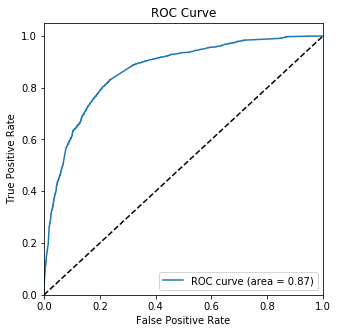

In [94]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion_Prob'])

The AUC or Area Under the Curve has a value of 0.87, indicating that the model is quite accurate.

### Making predictions on the test set

#### Scaling the test dataset

In [95]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

C:\Users\Avemaria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4462,0,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5243,0,0,-0.402157,-0.582031,-0.165214,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4597,0,0,-0.402157,-0.086672,-0.165214,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4680,0,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5355,0,0,-1.015121,-0.878510,-1.145788,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
X_test = X_test[X_train_rfe.columns]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4462,0,-0.878510,0,0,1,0,0,0,0,0,0,0,1,0
5243,0,-0.582031,0,0,0,0,0,0,0,0,0,0,0,0
4597,0,-0.086672,0,0,0,0,0,0,0,0,0,0,0,0
4680,0,-0.878510,1,0,0,1,0,0,0,0,0,0,1,0
5355,0,-0.878510,0,0,1,0,0,0,0,0,0,0,0,0


In [97]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set

In [98]:
y_test_pred = res.predict(X_test_sm)

In [99]:
y_test_pred[:10]

4462    0.626181
5243    0.140917
4597    0.222879
4680    0.996746
5355    0.281331
7071    0.093970
6314    0.982548
2688    0.996746
6228    0.146879
3014    0.083564
dtype: float64

In [100]:
# Converting y_test_pred to a dataframe
y_test_pred = pd.DataFrame(y_test_pred)
# Renaming the column
y_test_pred = y_test_pred.rename(columns = {0: 'Conversion_Prob'})
y_test_pred.head()

,Conversion_Prob
4462,0.626181
5243,0.140917
4597,0.222879
4680,0.996746
5355,0.281331


In [101]:
# Converting y_test to a dataframe
y_test = pd.DataFrame(y_test)
y_test.head()

,Converted
4462,1
5243,0
4597,1
4680,1
5355,0


In [102]:
# Putting index as the Lead ID
y_test['Lead ID'] = y_test.index
y_test.head()

,Converted,Lead ID
4462,1,4462
5243,0,5243
4597,1,4597
4680,1,4680
5355,0,5355


In [103]:
# Removing the indices of y_test_pred and y_test to append them
y_test_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [104]:
# Appending y_test_pred and y_test
y_pred = pd.concat([y_test, y_test_pred], axis=1)
y_pred.head()

,Converted,Lead ID,Conversion_Prob
0,1,4462,0.626181
1,0,5243,0.140917
2,1,4597,0.222879
3,1,4680,0.996746
4,0,5355,0.281331


In [105]:
# Moving Lead ID as the first column
y_pred = y_pred.reindex_axis(['Lead ID', 'Converted', 'Conversion_Prob'], axis = 1)
y_pred.head()

,Lead ID,Converted,Conversion_Prob
0,4462,1,0.626181
1,5243,0,0.140917
2,4597,1,0.222879
3,4680,1,0.996746
4,5355,0,0.281331


In [106]:
y_pred['predicted'] = y_pred['Conversion_Prob'].map(lambda x: 1 if x > 0.6 else 0)
y_pred.head()

,Lead ID,Converted,Conversion_Prob,predicted
0,4462,1,0.626181,1
1,5243,0,0.140917,0
2,4597,1,0.222879,0
3,4680,1,0.996746,1
4,5355,0,0.281331,0


### Calculating the Lead Score for the test dataset

In [107]:
y_pred['Lead Score'] = pd.to_numeric(round(y_pred['Conversion_Prob'] * 100), downcast = 'signed')
y_pred.head()

,Lead ID,Converted,Conversion_Prob,predicted,Lead Score
0,4462,1,0.626181,1,63
1,5243,0,0.140917,0,14
2,4597,1,0.222879,0,22
3,4680,1,0.996746,1,100
4,5355,0,0.281331,0,28


In [108]:
hot_leads_test = y_pred.loc[y_pred['Lead Score'] > 60]

#### Checking the conversion rate

In [109]:
round(sum(hot_leads_test['Converted'])/len(hot_leads_test.index) * 100, 2)

80.51

### Metrics Analysis - Test Dataset

#### Creating the confusion matrix

In [110]:
confusion_final = metrics.confusion_matrix(y_pred['Converted'], y_pred['predicted'])
print(confusion_final)

[[1533  148]
 [ 428  606]]


#### Checking the overall accuracy

In [111]:
print(metrics.accuracy_score(y_pred['Converted'], y_pred['predicted']))

0.7878453038674034


In [112]:
TP = confusion_final[1,1]
TN = confusion_final[0,0]
FP = confusion_final[0,1]
FN = confusion_final[1,0]

#### Checking the sensitivity of our logisitic regression model

In [113]:
print(TP/float(TP+FN))

0.586073500967118


#### Checking the specificity of our logisitic regression model

In [114]:
print(TN/float(TN+FP))

0.9119571683521713


#### Checking the false positive rate of our logisitic regression model

In [115]:
print(FP/float(TN+FP))

0.08804283164782867


#### Checking the positive predictive value of our logisitic regression model

In [116]:
print(TP/float(TP+FP))

0.8037135278514589


#### Checking the negative predictive value of our logisitic regression model

In [117]:
print(TN/float(TN+FN))

0.7817440081591025


#### Checking the precision of our logisitic regression model

In [118]:
precision = TP/float(TP+FP)
print(precision)

0.8037135278514589


#### Checking the recall of our logisitic regression model

In [119]:
recall = TP/float(TP+FN)
print(recall)

0.586073500967118


#### Calculating the F1 Score

In [120]:
F1 = 2 * (precision*recall)/(precision+recall)
print(F1)

0.6778523489932885


### Plotting the ROC Curve for the Test Dataset

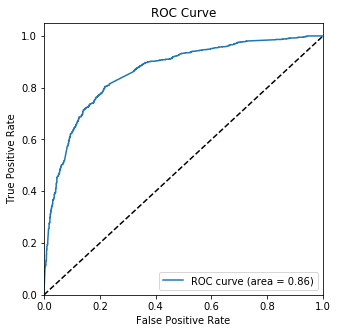

In [121]:
draw_roc(y_pred['Converted'], y_pred['Conversion_Prob'])

We have got an AUC of 0.86. So the model is doing well with the test dataset also.

### Assigning Lead Scores to the Lead Numbers

In [122]:
# Combining the train and test datasets
leads_test = y_pred.copy()
leads_test.head()

,Lead ID,Converted,Conversion_Prob,predicted,Lead Score
0,4462,1,0.626181,1,63
1,5243,0,0.140917,0,14
2,4597,1,0.222879,0,22
3,4680,1,0.996746,1,100
4,5355,0,0.281331,0,28


In [123]:
# Checking the shape of the leads_test
print(leads_test.shape)

(2715, 5)


In [124]:
leads_train = y_train_pred_final.copy()
leads_train.head()

,Lead ID,Converted,Conversion_Prob,predicted,Lead Score
0,8425,0,0.281331,0,28
1,8341,0,0.281331,0,28
2,7376,0,0.225771,0,23
3,7414,0,0.281331,0,28
4,3521,1,0.841733,1,84


In [125]:
# Checking the shape of the leads_train
print(leads_train.shape)

(6333, 5)


In [126]:
# Combining both the datasets
leads_score = pd.concat([leads_train, leads_test], axis = 0)
leads_score.head()

,Lead ID,Converted,Conversion_Prob,predicted,Lead Score
0,8425,0,0.281331,0,28
1,8341,0,0.281331,0,28
2,7376,0,0.225771,0,23
3,7414,0,0.281331,0,28
4,3521,1,0.841733,1,84


In [127]:
# Checking the shape of the leads_score
print(leads_score.shape)

(9048, 5)


In [128]:
leads_score = leads_score.set_index('Lead ID').sort_index(ascending=True, axis = 0)
leads_score.head()

,Converted,Conversion_Prob,predicted,Lead Score
Lead ID,,,,
0,0,0.163412,0,16
1,0,0.322532,0,32
2,1,0.738842,1,74
3,0,0.181147,0,18
4,1,0.442859,0,44


#### Getting the final dataframe with the lead numbers and the lead scores

In [129]:
leads_score = pd.concat([lead_numbers, leads_score], axis = 1)
leads_score.head()

,Lead Number,Converted,Conversion_Prob,predicted,Lead Score
0,660737,0,0.163412,0,16
1,660728,0,0.322532,0,32
2,660727,1,0.738842,1,74
3,660719,0,0.181147,0,18
4,660681,1,0.442859,0,44


#### Checking if there are any null values in the final lead score dataframe

In [130]:
round((leads_score.isnull().sum(axis = 0)/len(leads_score.index)) * 100, 2)

Lead Number        0.0
Converted          0.0
Conversion_Prob    0.0
predicted          0.0
Lead Score         0.0
dtype: float64

### Finding the Important Features

#### Getting the coefficients of the features from our final model 

In [131]:
res.params

const                                      -1.151205
Do Not Email                               -1.293074
Total Time Spent on Website                 1.127928
Lead Origin_Lead Add Form                   4.183952
Lead Origin_Lead Import                     1.780720
Lead Source_Olark Chat                      1.204234
Lead Source_Welingak Website                2.228894
Last Activity_Converted to Lead            -1.053510
Last Activity_Email Bounced                -0.861064
Last Activity_Had a Phone Conversation      2.482556
Last Activity_Olark Chat Conversation      -1.666727
Last Activity_Page Visited on Website      -0.695189
Last Notable Activity_Email Link Clicked   -0.692906
Last Notable Activity_SMS Sent              1.453735
Last Notable Activity_Unreachable           1.805835
dtype: float64

In [132]:
# Removing the intercept
features_coeff = round(res.params[1:], 2)
features_coeff

Do Not Email                               -1.29
Total Time Spent on Website                 1.13
Lead Origin_Lead Add Form                   4.18
Lead Origin_Lead Import                     1.78
Lead Source_Olark Chat                      1.20
Lead Source_Welingak Website                2.23
Last Activity_Converted to Lead            -1.05
Last Activity_Email Bounced                -0.86
Last Activity_Had a Phone Conversation      2.48
Last Activity_Olark Chat Conversation      -1.67
Last Activity_Page Visited on Website      -0.70
Last Notable Activity_Email Link Clicked   -0.69
Last Notable Activity_SMS Sent              1.45
Last Notable Activity_Unreachable           1.81
dtype: float64

#### Calculating the relative importance of all the features

In [133]:
# We will find the feature with the highest coefficient and calculate the 
# relative imporatnce of all the features wrt to the maximum coefficient value
maxCoeff = features_coeff.max()
rel_coeff = round(features_coeff/maxCoeff * 100, 2)
rel_coeff = rel_coeff.sort_values(ascending=False)
rel_coeff

Lead Origin_Lead Add Form                   100.00
Last Activity_Had a Phone Conversation       59.33
Lead Source_Welingak Website                 53.35
Last Notable Activity_Unreachable            43.30
Lead Origin_Lead Import                      42.58
Last Notable Activity_SMS Sent               34.69
Lead Source_Olark Chat                       28.71
Total Time Spent on Website                  27.03
Last Notable Activity_Email Link Clicked    -16.51
Last Activity_Page Visited on Website       -16.75
Last Activity_Email Bounced                 -20.57
Last Activity_Converted to Lead             -25.12
Do Not Email                                -30.86
Last Activity_Olark Chat Conversation       -39.95
dtype: float64

#### Plotting the feature variables based on their importance

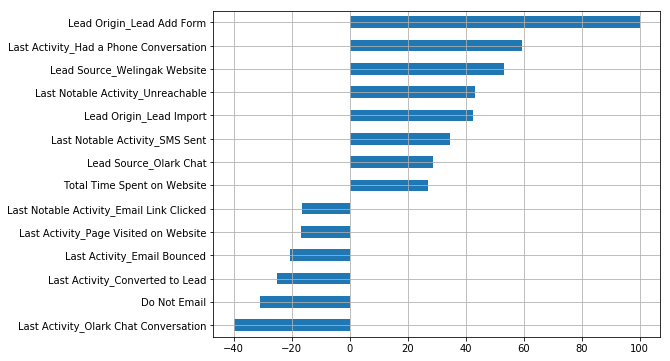

In [134]:
plt.figure(figsize=(8,6))
rel_coeff = rel_coeff.sort_values(ascending=True)
rel_coeff.plot.barh()
plt.grid()
plt.show()

#### Plotting the top 3 variables from our model

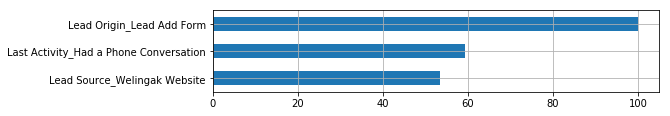

In [135]:
plt.figure(figsize=(8,1.5))
rel_coeff.nlargest(3).sort_values(ascending = True).plot.barh()
plt.grid()
plt.show()

### Summary

#### Our final logisitic regression model had the following metrics

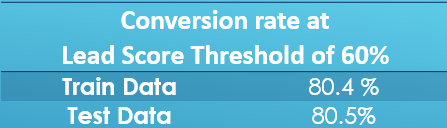
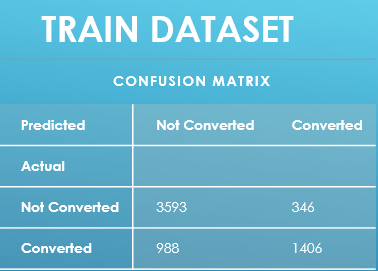
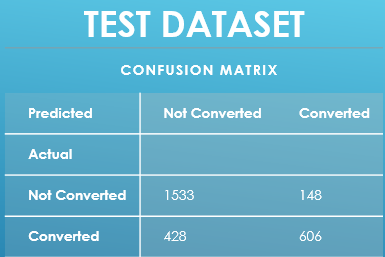
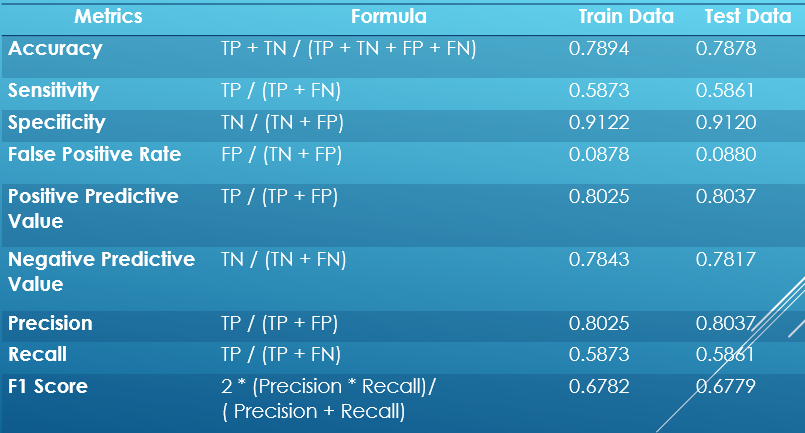

### Recommendations

The top 3 features whose increase contributed to an increase in the conversion probability of a lead are:
- Lead Origin_Lead Add Form
- Last Activity_Had a Phone Conversation
- Lead Source_Welingak Website

The top 3 features whose increase contributed to a decrease in the conversion probability of a lead are:
- Last Activity_Olark Chat Conversation
- Do Not Email 
- Last Activity_Converted to Lead

<br>

- With respect to the logisitic regression model for lead scoring, sensitivity will be the ratio of total number of correctly predicted lead conversions to the total number of actual conversions. 


- The specificity of a logistic regression model for lead scoring will the ratio of total number of correctly predicted lead non-conversions to the total number of actual non-conversions.


- As the sensitivity of our model increases, the specificity will decrease. We can increase the sensitivity and thereby decrease the specificity by decreasing the cutoff threshold of the conversion probabilities. Similarly, we can decrease the sensitivity and thereby increase the specificity by increasing the cutoff threshold of the conversion probabilities.


<br>

- For a business environment where we have ample resources to gear up the sales drive and target as many leads as possible, we can think of decreasing the cutoff threshold of the conversion probabilities and thereby increasing the sensitivity. 


- This will ensure that most of the leads that are likely to convert are identified so that the sales team can make their pitch to these leads. 


- The drawback here could be that some of the leads identified as likely to convert are in fact, unlikely candidates. But since we have ample resources to deal with this event, it is a risk we can willingly take.


<br>

- Considering the scenario, where a company does not want to spend time on candidates unlikely to convert and in fact, have a shortage of resources to such an extent that they are willing to lose a few possible conversions, we can think of increasing the cutoff threshold of the conversion probabilities and thereby increasing the specificity.


- This approach will ensure that valuable resources are not wasted on candidates who hover very close around the possibility of not converting.


- The meagre resources of the company can be targeted towards the much stronger leads and thereby reduce potential losses of chasing weak leads.


- The drawback here are the chances of losing potential leads are rather high.